In [235]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from matplotlib.backends.backend_pdf import PdfPages

In [123]:
def activation(x, r):
    r = torch.tensor(r)
    return torch.abs(x-r).sum(dim=1)

In [160]:
class MLP(torch.nn.Module):
    def __init__(self, layer_info, activation):
        super(MLP, self).__init__()
        self.L = len(layer_info)-1
        self.func = activation
        self.W = []
        self.b = []
        for i in range(self.L):
            self.W.append(torch.randn(layer_info[i], layer_info[i+1]))
            self.b.append(torch.randn(layer_info[i+1]))

    def forward(self, x):
        for i in range(self.L-1):
            x = self.func(torch.matmul(x, self.W[i])+self.b[i])
        return torch.matmul(x, self.W[-1])+self.b[-1]

In [309]:
H = 32
net = MLP([2, H, H, H, 3], torch.nn.Tanh())

In [310]:
height = 1600
width = 2560
x = torch.linspace(-16, 16, height)
y = torch.linspace(-25.6, 25.6, width)
xv, yv = torch.meshgrid([x, y])

In [311]:
xy = torch.stack([xv, yv])
xy = xy.permute(1, 2, 0)
xy = xy.view(-1, 2)
#z = activation(xy, [0., 0.])
#xyz = torch.cat([xy, z.view(-1, 1)], dim=1)

In [312]:
img = torch.sigmoid(net(xy)).detach().view(height, width, 3)

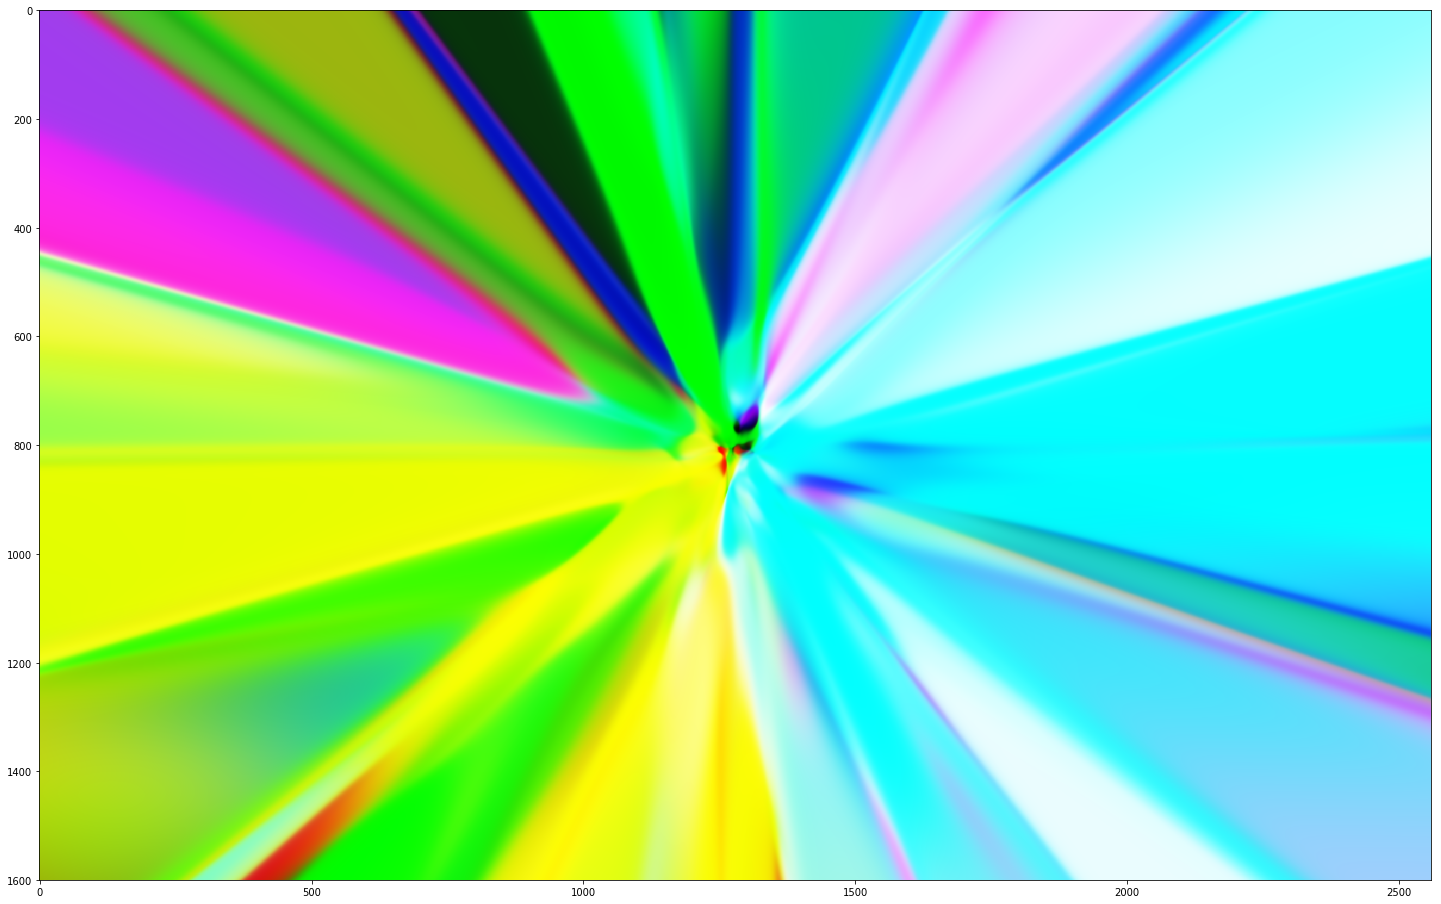

In [313]:
plt.figure(figsize=(width/100, height/100))
plt.imshow(img)

In [314]:
torchvision.utils.save_image(img.permute(2,0,1), "background6.png")